# 머신러닝의 정의와 유형
머신러닝은 데이터를 기반으로 학습하고, 새로운 데이터를 예측하거나 분류하는 모델을 만드는 컴퓨터 과학 분야이다. 명시적인 규칙을 프로그래밍하는 대신, 데이터 속에서 패턴을 찾아 스스로 학습한다.

> 복잡한 규칙을 일일이 코딩하기 어려운 문제(예: 이미지 속 고양이 인식, 스팸 메일 분류)를 해결할 수 있다.

- 주요 유형:
  - 지도 학습(Supervised Learning): 정답(레이블)이 있는 데이터를 이용해 학습한다.
    - 분류(Classification): 범주형 값(예: 스팸/정상 메일)을 예측한다.
    - 회귀(Regression): 연속형 값(예: 집값, 주가)을 예측한다.

  - 비지도 학습(Unsupervised Learning): 정답(레이블)이 없는 데이터의 숨겨진 패턴이나 구조를 발견한다.
    - 군집(Clustering): 유사한 데이터끼리 그룹화한다.
    - 차원 축소(Dimensionality Reduction): 데이터의 특성 수를 줄인다.

  - 강화 학습(Reinforcement Learning): 특정 환경에서 행동에 대한 보상을 최대화하는 방법을 스스로 학습한다.

## Scikit-learn
Scikit-learn은 Python을 위한 무료 머신러닝 라이브러리로 지도 학습, 비지도 학습, 모델 선택, 전처리 등 다양한 기능을 제공하며, 범용적인 머신러닝 알고리즘을 쉽게 사용할 수 있게 해준다.

### 다른 개념과의 관계
Scikit-learn은 NumPy를 기반으로 데이터 계산을 수행하고, Pandas로 데이터를 다루며, Matplotlib으로 결과를 시각화하는 등 파이썬 데이터 과학 생태계의 핵심 라이브러리들과 긴밀하게 연동된다.

- 장점:
  - 일관성: 모든 모델(Estimator)에 fit(), predict(), transform()과 같은 동일한 인터페이스가 적용되어 있어, 다른 모델로 교체하더라도 코드를 크게 수정할 필요가 없다.
    - `fit()` <br>모델을 학습시키는 메서드이다. fit(X, y) 형태로 사용하며, 여기서 X는 훈련 데이터(피처), y는 타겟 변수(레이블)이다. 모델이 데이터를 학습하여 최적의 파라미터를 찾는 과정을 수행한다. 예를 들어, 선형 회귀 모델은 fit() 메서드를 통해 최적의 가중치와 절편을 찾는다.

    - `predict()` <br> 학습된 모델을 사용하여 새로운 데이터에 대한 예측을 수행하는 메서드이다. predict(X_new) 형태로 사용하며, 모델이 이전에 본 적 없는 X_new 데이터의 결과를 예측한다. fit()을 통해 모델이 충분히 학습된 후에만 사용할 수 있다.

    - `transform()` <br> 데이터를 변환하는 메서드이다. 주로 전처리 단계에서 사용하며, X 데이터를 새로운 형태로 바꾼다. 예를 들어, **스케일러(scaler)**는 fit()으로 데이터의 평균과 표준편차를 학습하고, transform()으로 이 정보를 이용해 데이터를 표준화한다. TF-IDF 벡터라이저는 fit()으로 단어 사전을 구축하고, transform()으로 문서를 TF-IDF 벡터로 변환한다.
    
    - `fit_transform()` <br>fit()과 transform()을 순차적으로 실행하는 편리한 메서드이다. fit(X)를 호출하여 파라미터를 학습한 후, 곧바로 transform(X)을 호출하여 데이터를 변환한다. 주로 훈련 데이터에 대해 한 번에 학습과 변환을 적용할 때 사용한다.

  - 쉬운 사용성: 복잡한 알고리즘을 몇 줄의 코드로 구현할 수 있어 초보자도 쉽게 접근할 수 있다.

  - 풍부한 기능: 분류, 회귀, 클러스터링, 전처리 등 머신러닝에 필요한 대부분의 기능을 포함하고 있다.

#### Scikit-learn 설치 확인


In [ ]:
!pip install scikit-learn # 설치 (colab은 기본적으로 설치되어 있다.)

In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


#### 머신러닝 데이터셋 탐색
- Scikit-learn에 내장된 '캘리포니아 주택 가격' 데이터셋을 로드한다.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR) # 데이터셋 설명 출력
print(housing) # 데이터셋

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

- 데이터의 특성(Feature)과 타겟(Target)의 형태를 확인한다.



In [9]:
# 특성과 타겟을 DataFrame으로 변환
X = housing.data # 주택의 여러 특징(예: 중간 소득, 주택 연령 등)을 담고 있는 특성 데이터이다.
y = housing.target # 특성들을 기반으로 예측해야 하는 목표 값, 즉 중앙값 주택 가격이다.

# 데이터의 형태 확인
print("특성 데이터 형태 (X):", X.shape)
print("타겟 데이터 형태 (y):", y.shape)


특성 데이터 형태 (X): (20640, 8)
타겟 데이터 형태 (y): (20640,)


- 데이터의 통계적 요약 정보를 출력한다.
  - count: 결측치를 제외한 데이터의 개수를 의미한다. 이 경우 총 데이터가 20,640개라는 것을 나타낸다.
  - mean: 데이터의 평균값이다. 모든 데이터를 더해 개수로 나눈 값이다.
  - std (standard deviation): 데이터의 표준 편차를 의미한다. 데이터가 평균으로부터 얼마나 퍼져 있는지(분산 정도)를 나타내는 척도이다. 값이 작을수록 데이터가 평균 주변에 밀집해 있고, 값이 클수록 넓게 퍼져 있다.

  - min: 데이터의 최솟값이다.
  - 25% (1사분위수): 데이터를 오름차순으로 정렬했을 때, **하위 25%**에 해당하는 위치의 값이다.
  - 50% (중앙값): 데이터를 오름차순으로 정렬했을 때, 정중앙에 위치하는 값이다. 평균(mean)이 극단값에 영향을 받는 것과 달리, 중앙값은 데이터의 중간 경향을 잘 나타낸다.
  - 75% (3사분위수): 데이터를 오름차순으로 정렬했을 때, **하위 75%**에 해당하는 위치의 값이다.
  - max: 데이터의 최댓값이다.

In [10]:

# 데이터 통계 정보 요약
print("\n--- 특성 데이터 통계 ---")
print(X.describe())

print("\n--- 타겟 데이터 통계 ---")
print(y.describe())


--- 특성 데이터 통계 ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741

- 주요 특성 두 개와 타겟 변수 간의 관계를 산점도로 시각화한다.

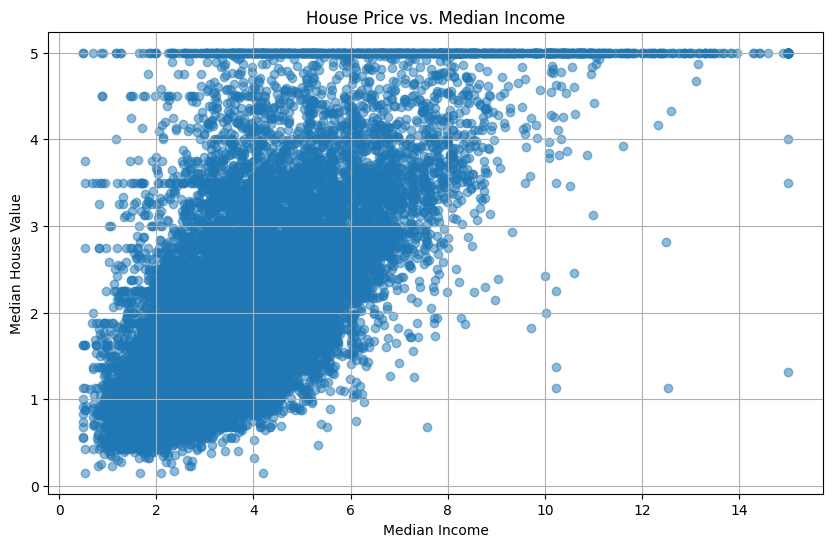

In [11]:
# 중위 소득(MedInc)과 주택 가격(MedHouseVal)의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X['MedInc'], y, alpha=0.5)
# X축: X['MedInc'], 즉 데이터셋의 'MedInc'(중앙값 소득) 특성을 사용한다.
# Y축: y, 즉 'Median House Value'(중앙값 주택 가격) 타겟 변수를 사용한다.
# alpha=0.5: 점의 투명도를 0.5로 설정하여 점이 겹쳐 있는 부분을 더 진하게 보이게 한다.

plt.title('House Price vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()